In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import interpolate

%matplotlib notebook

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
def branch(x, y):
    I = interpolate.interp1d(x, y)
    return I
N = 1E18
W1 = 3359*N**-0.5 #cm/(V)^0.5 for Ga2O3
V = np.linspace(0.4, 80, 100)
W = W1*(V + 1.2)**0.5
E = 2*(V + 1.2)**(0.5)/W1
I = []
for i in ['dark', '190', '390']:
    csv = np.loadtxt('data/' + i + '.csv', delimiter = ',')
    #print(i)
    temp = branch(csv[:,0], csv[:,1])
    I.append(temp(V))

<IPython.core.display.Javascript object>


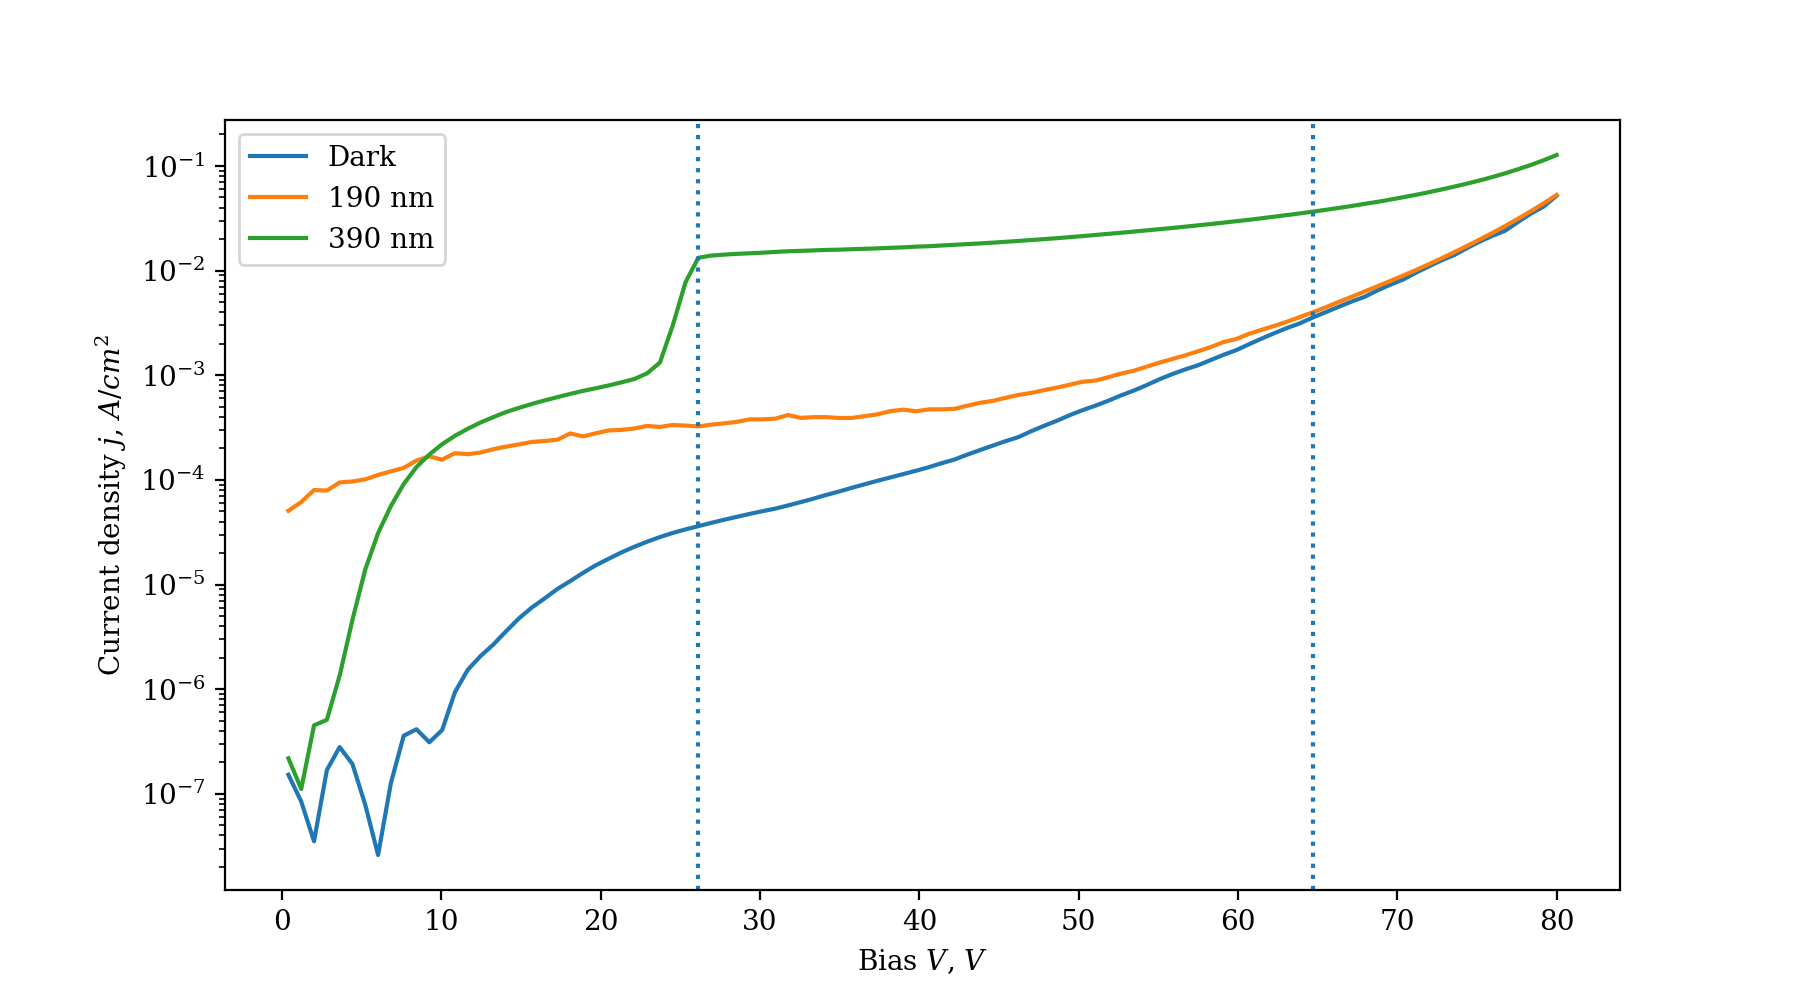

In [3]:
fig = plt.figure(figsize=(9,5)) 
ax  = fig.add_subplot(111)
ax.set_ylabel('Current density $j$, $A/{cm}^{2}$')
ax.set_xlabel('Bias $V$, $V$')
ax.set_yscale('log')

ax.plot(V, I[0], label = 'Dark'  )
ax.plot(V, I[1], label = '190 nm')
ax.plot(V, I[2], label = '390 nm')

ax.axvline(V[80], ls = ':')
ax.axvline(V[32], ls = ':')
ax.legend()

$$1 - M^{-1} = \int_0^{\infty} \alpha(x) dx$$

$$w = w_1 (V+V_d)^{1/2}$$

$$w_1 = \left(\frac{2\epsilon}{q N}\right)^{1/2}$$

$$E_m = 2{(V+V_d)}^{1/2}/w_1$$

$$1-M^{-1} = \frac{w^2_1}{2} \int_0^{E_m} \alpha(E) dE$$

$$\alpha(E) = E_m \frac{dM}{dV} \frac{1}{M^2}$$

since [1] for $F(x) = \int_a^{x}f(u)du$ $\rightarrow$ $\frac{d F(x)}{dx} = f(x), F(a) = 0$

or including generation $\frac{dM}{dx}\frac{1}{M^2} = \alpha \exp{(-\alpha x)}$

<a href = "https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus">[1]</a>

<a href = "https://en.wikipedia.org/wiki/Numerical_integration">[2]</a>

<a href = "https://sci-hub.st/https://doi.org/10.1063/1.1662742">Article</a>

In [4]:
def Multiplication(I_dark, I_photo, unity = 32):
    '''Returns multiplication factor from 
    dark and under illumination IV data'''
    
    print('V(unity=%.0f) = %.2f V'%(unity, V[unity]))
    M = (I_photo - I_dark)/(I_photo[unity] - I_dark[unity])
    return M

def Avalance(V, E, M):
    '''Calculates avalance coefficient from M(V) data'''
    alpha = 2/W1*np.gradient(M)/np.gradient(V)*1/M**2
    return alpha

V(unity=34) = 27.74 V
V(unity=34) = 27.74 V


<IPython.core.display.Javascript object>


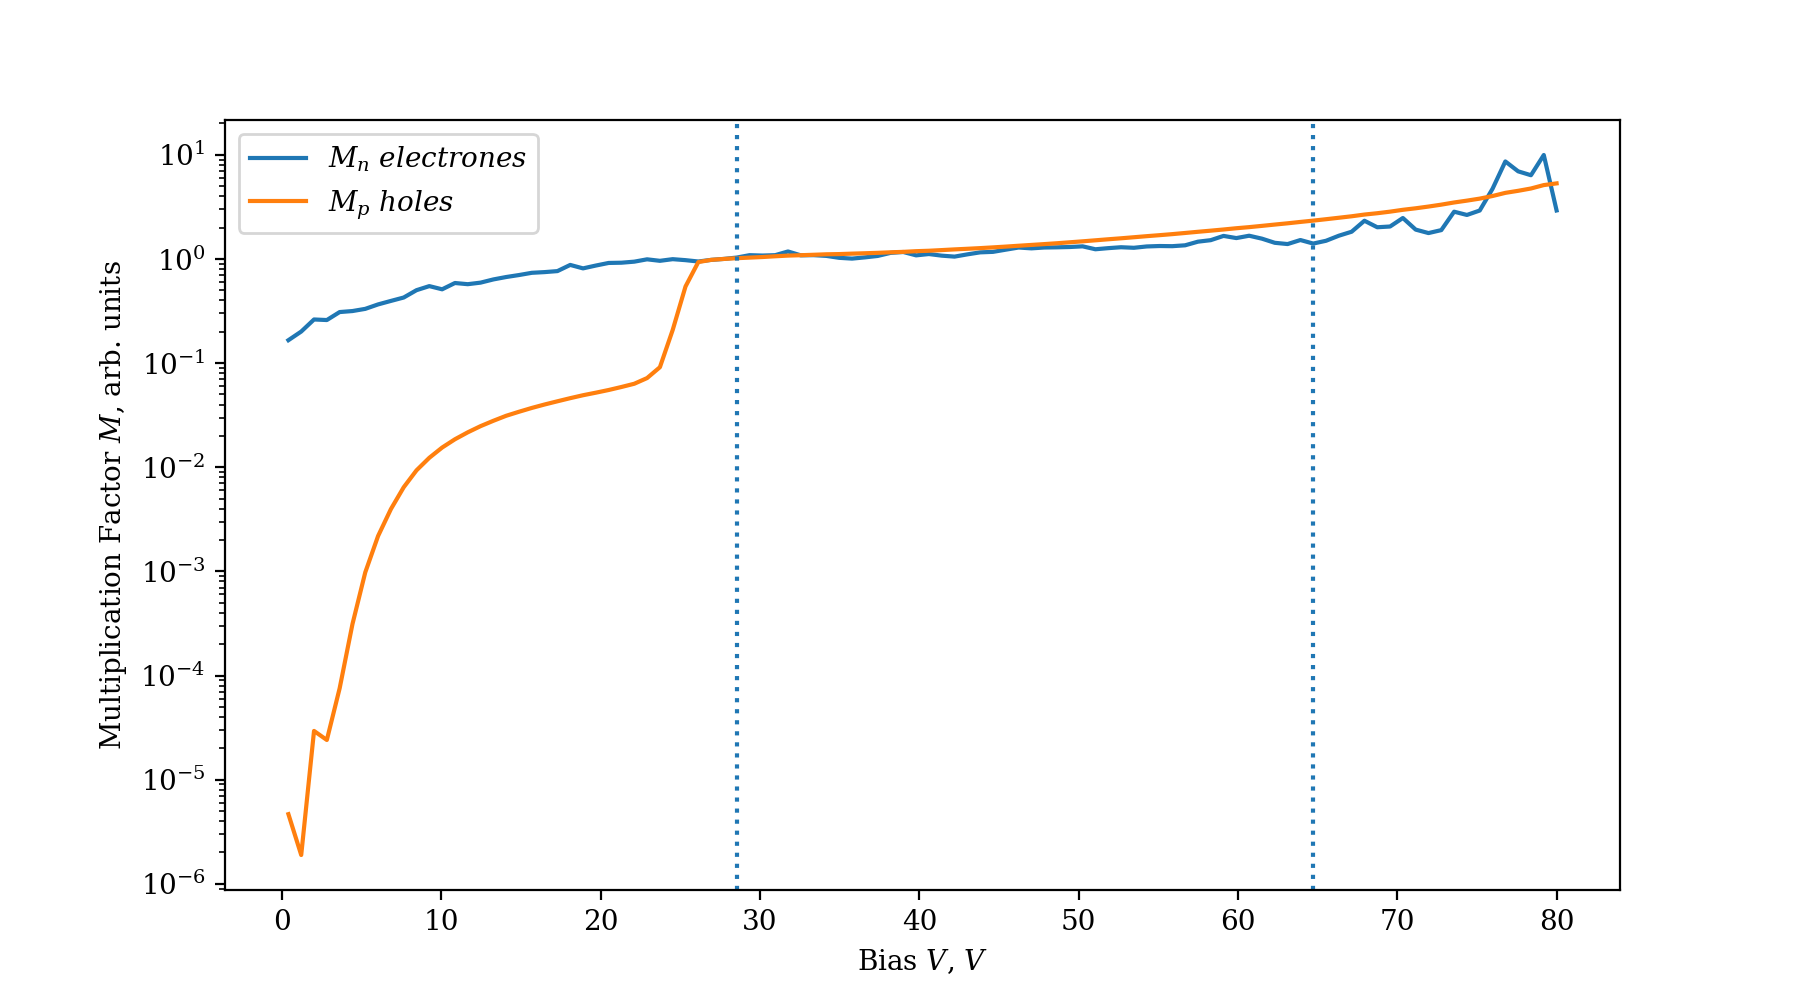

In [5]:
M = []
for i in range(1,3):
    M.append(Multiplication(I[0], I[i], 34))
    

fig = plt.figure(figsize=(9,5)) 
ax  = fig.add_subplot(111)
ax.set_ylabel('Multiplication Factor $M$, arb. units')
ax.set_xlabel('Bias $V$, $V$')
ax.set_yscale('log')

ax.plot(V, M[0], label = r'$M_n \,\,electrones$')
ax.plot(V, M[1], label = r'$M_p \,\,holes$')

ax.axvline(V[80], ls = ':')
ax.axvline(V[35], ls = ':')
ax.legend()

<IPython.core.display.Javascript object>


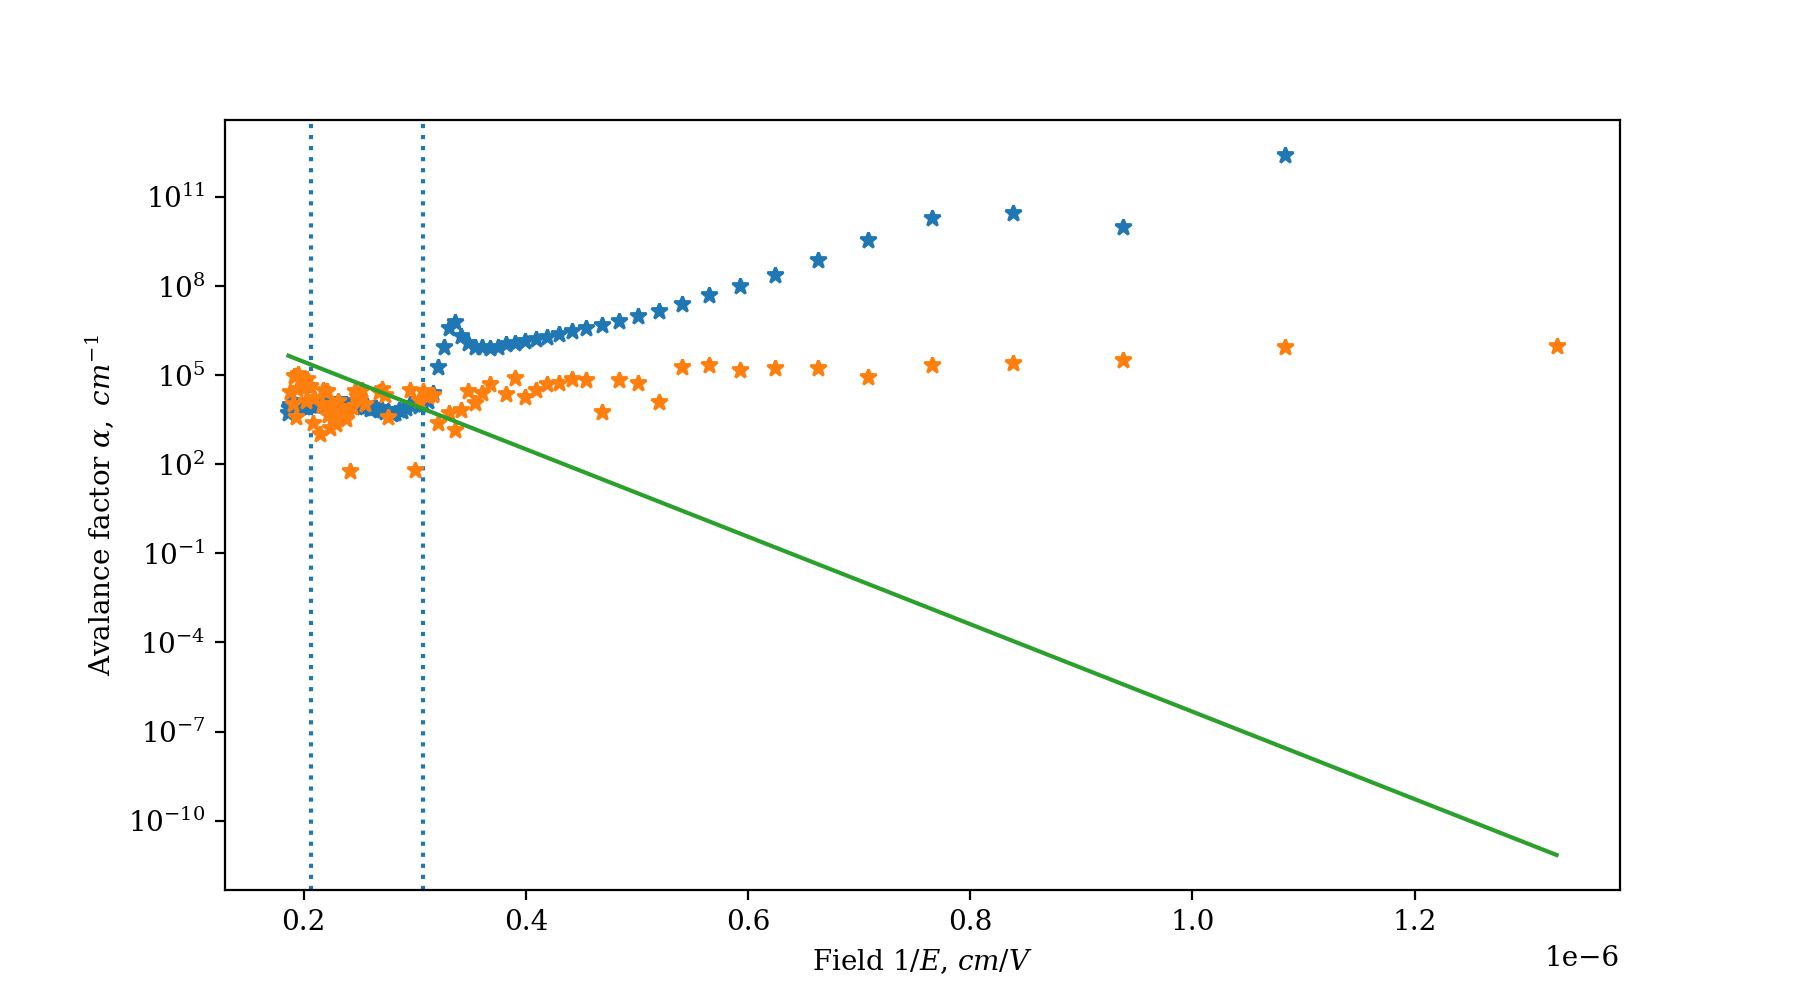

In [6]:
a = []
for i in range(0,2):
    a.append(Avalance(V, E, M[i]))

    
fig = plt.figure(figsize=(9,5)) 
ax  = fig.add_subplot(111)
ax.set_ylabel(r'Avalance factor $ \alpha,\,\,{cm}^{-1}$')
ax.set_xlabel('Field $1/E$, $cm/V$')
ax.set_yscale('log')

ax.axvline(1/E[80], ls = ':')
ax.axvline(1/E[35], ls = ':')

ax.plot(1/E, a[1], '*')
ax.plot(1/E, a[0], '*')
ax.plot(1/E, 2.48*10**8*np.exp(-3.39*10**7/E), '-')

ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))